## Chapter 5: Mode Networks

In this chapter, we'll explore how to analyze networks with two or more different types of nodes. 



## Theory of 2-Mode Networks 

Much of network data currently availble comes in a *2-mode* (or bimodal, or bipartite) format -- that is, there are two different types of nodes, and links determine relationships between one set of nodes and the other. 

Sociologists recognize a concept called **duality of persons and groups** -- people's ideas, attitudes, and social connections are shaped by membership in groups, and groups are shaped by the attitudes of their members. Since people are seldom members of only one group, co-membership can be viewed as a way to analyze and aggregate similiarities and differences between individuals. 

### Affiliation Networks  

Links determined through comembership

### Attribute Networks  

Links determined by shared attributes  

### 2-Mode Networks in Practice  

In [3]:
import csv 
import math 
import networkx as net

# import bi-partite (bi-modal) functions 
from networkx.algorithms import bipartite as bi

# read the data
r = csv.reader(open('campaign_short.csv', 'r'))

## 2-mode graphs are usually directed. Here, their direction implies moey flow
g = net.Graph()

## we need to keep track separately of nodes of all types 
pacs = []
candidates = []

## Construct a directed graph from edges in the CSV file
for row in r:
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0], row[12], weight=int(row[10]))

### PAC Networks  

Now we have a graph object -- what can we do with it? Let's start by computing an affiliation network of the PACs:

In [4]:
pacnet = bi.weighted_projected_graph(g, pacs, ratio=False)

The network has a connected component and a couple isolates. These artifacts of when we wantonly chopped off a piece of a dataset for use as an example -- and we can throw them away here just as well, by taking only the largest connected component:

In [5]:
pacnet = net.connected_component_subgraphs(pacnet)[0]

We would like to plot the resulting network and highlight strength of relationship using color and edge thickness. Since edge value will vary widely, it is wise to take us its logarithm to compress the numeric range:

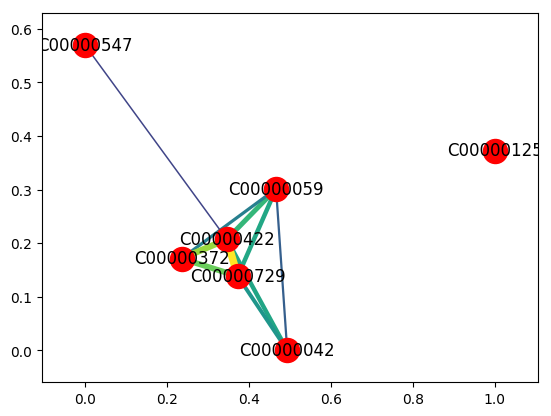

In [11]:
weights = [math.log(edata['weight']) for f, t, edata in pacnet.edges(data=True)]

# now we draw the graph 
net.draw_networkx(pacnet, width=weights, edge_color=weights);

### Candidate Networks  

To compute the candidate network, we shall simply reverse the direction of projection -- and compute a projected graph on the candidates table rather than the pacs table:

/Users/joshiden/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:502: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/joshiden/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:506: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/Users/joshiden/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:512: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/Users/joshiden/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:718: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


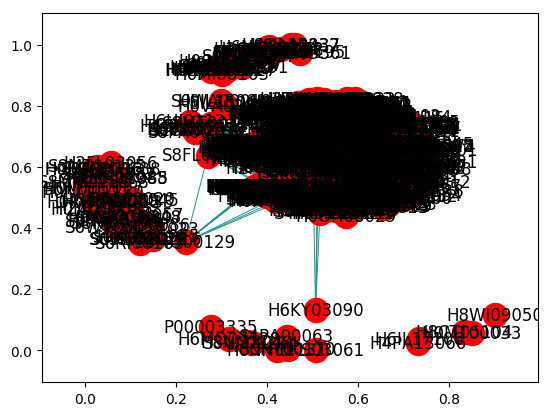

In [12]:
cannet = bi.weighted_projected_graph(g, candidates, ratio=False) 
cannet = net.connected_component_subgraphs(cannet)[0]
weights = [math.log(edata['weight']) for f, t, edata in cannet.edges(data=True)]
net.draw_networkx(cannet, width=weights, edge_color=weights);b

The resulting network is significantly larger and will take a long time to draw; it will look something like a hairball. It is clear that the network has a number of distinct clusters; we will now try to find them using the *island method*. First, let's look at a histogram of edge values -- this will help us determine where to place the "water level". Approximately 80% of edges are weighted below 0.9, so we can safely remove them:

In [13]:
def trim_edges(g, weight=1):
    g2 = net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, edata)
    return g2

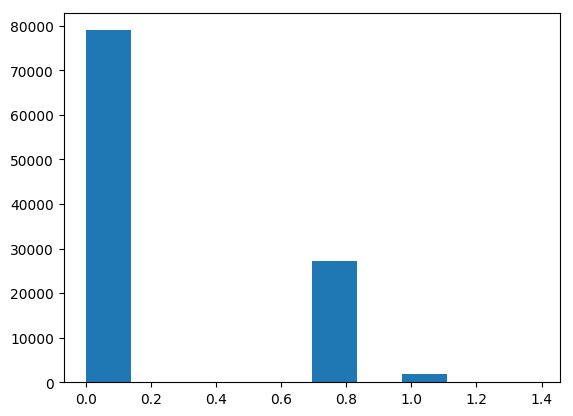

In [16]:
import matplotlib.pyplot as plt

plt.hist(weights);

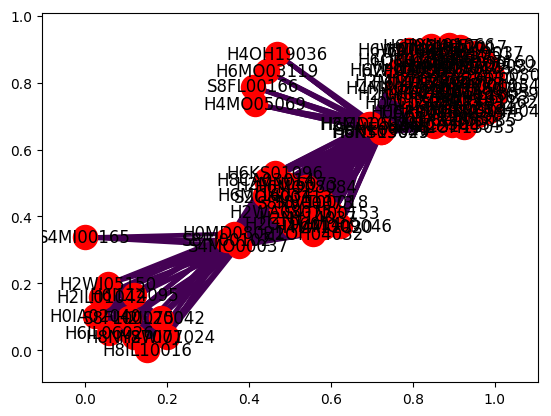

In [20]:
cannet_trim = trim_edges(cannet, weight=math.exp(0.9))

## recalculate weights bsed on the new graph
weights = [edata['weight'] for f, t, edata in cannet_trim.edges(data=True)]
net.draw_networkx(cannet_trim, width=weights, edge_color=weights);

The core network clearly contains a number of cohesive clusters that are connected by boundary spanner candidates. 

From this point on, we can use hierarchical clustering to determine who is in these clusters. Boundary spanners can be found using betweenness centrality or triad census. 

## Expanding Multimode Networks  

